# CS178 Final Project (KNN)

### Cameron Napoli, 73223093

In [1]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import time, sys
from math import log

from random import randrange

In [2]:
np.random.seed(1294879247)

X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

In [3]:
# use random subset of data to classify (my computer is really slow)
size1, size2 = 30000, 31000
X2, Y2 = X[size1:size2], Y[size1:size2]
Xtr, Xva, Ytr, Yva = ml.splitData(X2, Y2, 0.75)

--- Choosing the best k value ---
Testing K=1
Testing K=25
Testing K=45
Testing K=55
Testing K=65
Testing K=75
Testing K=85
Testing K=95
Testing K=115


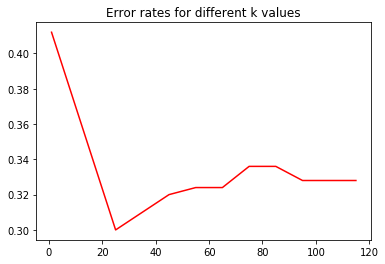

Best K=25 (err=0.3)
- 1.6081 seconds to complete execution of k search -


In [4]:
# KNN
print("--- Choosing the best k value ---")
start_time = time.time()

# optimal k range seems to be 45 - 95
k_values = [1, 25, 45, 55, 65, 75, 85, 95, 115]
err_values = []

for k in k_values:
    print("Testing K=%s" % k)
    knn = ml.knn.knnClassify(Xtr, Ytr, K=k)
    err = knn.err(Xva, Yva)
    err_values.append(err)

plt.title("Error rates for different k values")
plt.plot(k_values, err_values, 'r-')
plt.show()

best_k = np.argmin(err_values)
print("Best K=%s (err=%s)" % (k_values[best_k], err_values[best_k]))

print("- %s seconds to complete execution of k search -" % round((time.time() - start_time), 4))

--- Choosing the most important features ---
Testing Feature 1
Testing Feature 2
Testing Feature 3
Testing Feature 4
Testing Feature 5
Testing Feature 6
Testing Feature 7
Testing Feature 8
Testing Feature 9
Testing Feature 10
Testing Feature 11
Testing Feature 12
Testing Feature 13
Testing Feature 14


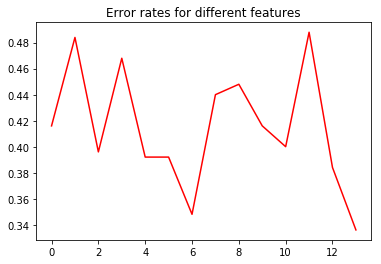

Best features=[13, 6]
- 0.79 seconds to complete execution of feature search -


In [5]:
print("--- Choosing the most important features ---")
start_time = time.time()


def n_lowest_vals(x, n):
    """ Return indices of n lowest values in arr (not very efficient but doesn't need to be) """
    t, res = x, []
    for i in range(n):
        ind_lowest = np.argmin(t)
        t[ind_lowest] = 9e99
        res.append(ind_lowest)
    return res



x_values = [x for x in range(X.shape[1])]
err_values2 = []

for i in range(X.shape[1]):
    print("Testing Feature %s" % str(i+1))
    s1, s2 = i, i+1
    knn = ml.knn.knnClassify(Xtr[:,s1:s2], Ytr, K=best_k)
    err_values2.append(knn.err(Xva[:,s1:s2], Yva))

plt.title("Error rates for different features")
plt.plot(x_values, err_values2, 'r-')
plt.show()
    
# print(err_values2)
N = 2
best_f = n_lowest_vals(err_values2, N)
print("Best features=%s" % (best_f,))
print("- %s seconds to complete execution of feature search -" % round((time.time() - start_time), 4))

In [6]:
print("--- Calculating AUC Score for this classifier ---")

def reform_data(Xt, best_f):
    Xtr_mod = np.zeros((Xt.shape[0], len(best_f)))
    for i in range(len(best_f)):
        Xtemp = Xt[:,best_f[i]]
        Xtr_mod[:,i] = Xtemp
    return Xtr_mod


knn = ml.knn.knnClassify(reform_data(Xtr, best_f), Ytr, K=best_k)

auc_score = round(knn.auc(reform_data(Xva, best_f), Yva), 8)
print("AUC Score: %s" % str(auc_score))

--- Calculating AUC Score for this classifier ---
AUC Score: 0.55450545


In [7]:
print("--- Depositing data in file for Kaggle ---")

# load Kag test data

# Yva = np.vstack((np.arange(Xva.shape[0]), knn.predictSoft(Xva)[:,1])).T
# np.savetxt('Y_submit.txt', Yva, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')

--- Depositing data in file for Kaggle ---


In [8]:
# Perceptron



In [9]:
# Logistic Regression

# Steve

In [10]:
# Random forest

# Bruce

In [11]:
# Multi-layer Perceptron (Neural Net)

# class nnetClassify
# nnet = ml.nnetClassify()
# nnet.set_layers([2,2])
# nnet.init_weights()